## Arima Exercise

In [45]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

In [4]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates = ['Month'], 
                 index_col = ['Month'])\
       .rename(columns={'#Passengers':'Passengers'})

**Task:** Print the top 5 rows.

In [5]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Task:** Create the function called `plot_timeseries(df)`.

In [6]:
def plot_timeseries(df):
    df.plot()

**Task:** Plot the time series from above.

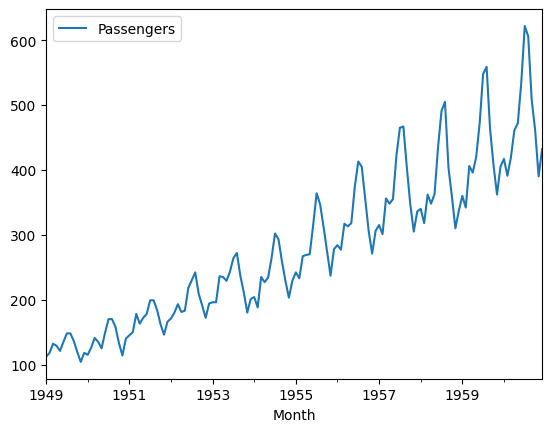

In [7]:
plot_timeseries(df)

**Task:** Compute the rolling mean and the rolling std with an appropriate window size.

In [8]:
rolling = df.rolling(window=12)
rolling_mean = rolling.mean().dropna()
print(rolling_mean.head(10))

            Passengers
Month                 
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
1950-04-01  128.833333
1950-05-01  129.166667
1950-06-01  130.333333
1950-07-01  132.166667
1950-08-01  134.000000
1950-09-01  135.833333


In [9]:
rolling = df.rolling(window=12)
rolling_std = rolling.std().dropna()
print(rolling_std.head(10))

            Passengers
Month                 
1949-12-01   13.720147
1950-01-01   13.453342
1950-02-01   13.166475
1950-03-01   13.686977
1950-04-01   13.822467
1950-05-01   13.663710
1950-06-01   14.760718
1950-07-01   18.135016
1950-08-01   20.797727
1950-09-01   21.928949


**Task:** Plot the two time series:
- with rolling mean 
- with rolling std

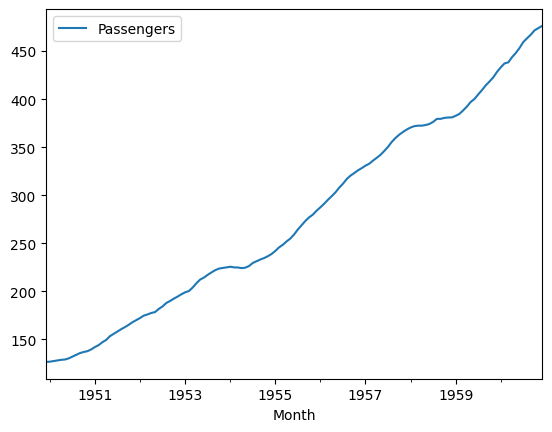

In [10]:
rolling_mean.plot()
plt.show()

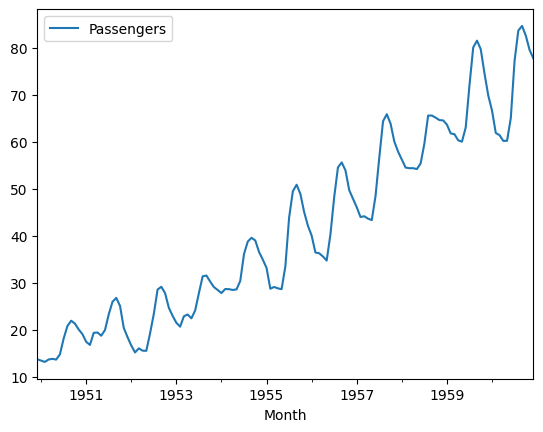

In [11]:
rolling_std.plot()
plt.show()

**Task:** Test the stationarity of all the time series

In [12]:
def ADF_Stationarity_Test(timeseries, significance_level):
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    timeseries = pd.DataFrame(timeseries)
    X = timeseries.values
    significance_level_trans = round(significance_level*100)
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
	    print('\t%s: %.3f' % (key, value))
    key = str(significance_level_trans)+'%'
    if result[0] <= result[4][key]:
        print('Based on a significance level of %s, this time series is stationary' % significance_level)
    else:
        print('Based on a significance level of %s, this time series is non-stationary' % significance_level)

In [13]:
ADF_Stationarity_Test(timeseries=df, significance_level=0.05)

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Based on a significance level of 0.05, this time series is non-stationary


In [14]:
ADF_Stationarity_Test(timeseries=rolling_mean, significance_level=0.05)

ADF Statistic: 0.873695
p-value: 0.992737
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Based on a significance level of 0.05, this time series is non-stationary


In [15]:
ADF_Stationarity_Test(timeseries=rolling_std, significance_level=0.05)

ADF Statistic: 1.286869
p-value: 0.996534
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580
Based on a significance level of 0.05, this time series is non-stationary


**Task:** Perform a log transformation on the original time series. 

In [16]:
df_log = np.log(df)

**Task:** Plot the transformed time series.

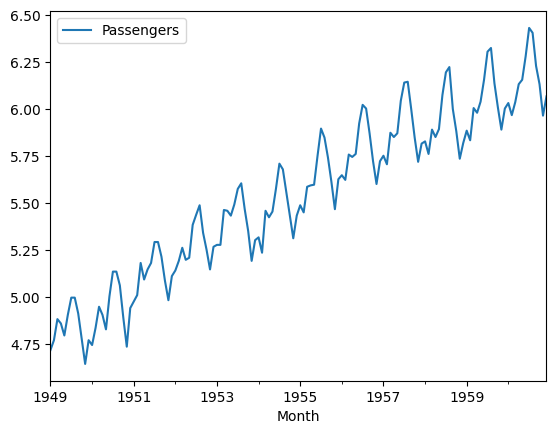

In [17]:
plot_timeseries(df_log)

**Task:** Test the stationarity of the transformed time series. If it isn't stationary, try a different transformation technique. 

In [18]:
ADF_Stationarity_Test(timeseries=df_log, significance_level=0.05)

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Based on a significance level of 0.05, this time series is non-stationary


In [19]:
df_diff = df_log.diff().dropna()

In [20]:
ADF_Stationarity_Test(timeseries=df_diff, significance_level=0.05)

ADF Statistic: -2.717131
p-value: 0.071121
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Based on a significance level of 0.05, this time series is non-stationary


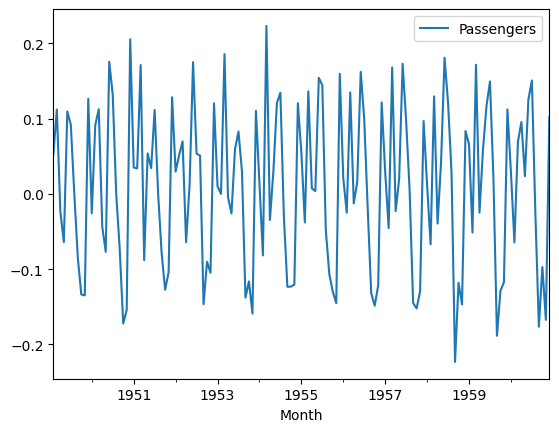

In [21]:
plot_timeseries(df_diff)

In [22]:
df_diff_2 = df_diff.diff().dropna()
ADF_Stationarity_Test(timeseries=df_diff_2, significance_level=0.05)

ADF Statistic: -8.196629
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Based on a significance level of 0.05, this time series is stationary


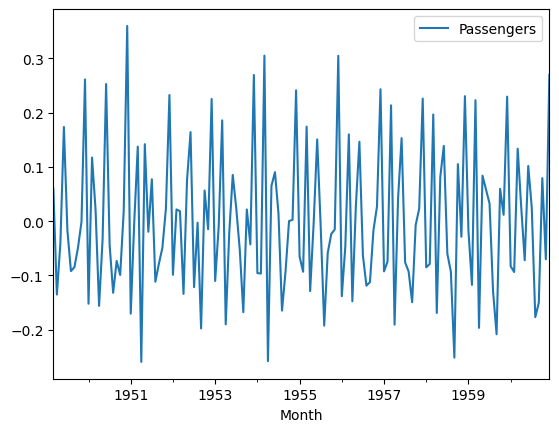

In [23]:
plot_timeseries(df_diff_2)

array([[<AxesSubplot: title={'center': 'Passengers'}>]], dtype=object)

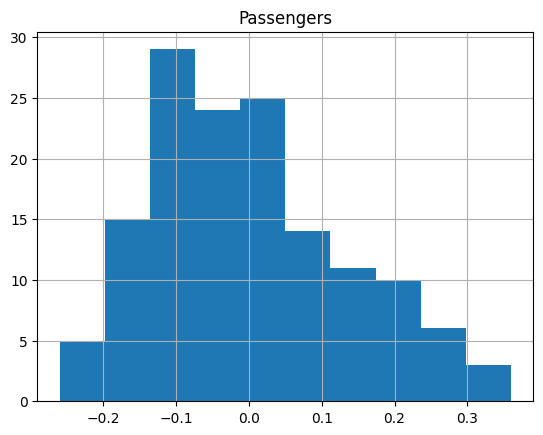

In [24]:
df_diff_2.hist()

In [25]:
X = df_diff_2
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.000043, mean2=0.000663
variance1=0.018599, variance2=0.018116


In [41]:
d = 2

**Task:** Use the stationary time series and find the optimal `(p, d, q)` parameters of ARIMA model.

In [38]:
from statsmodels.tsa.stattools import pacf
pacf(df_log)

array([ 1.        ,  0.96037262, -0.13823675,  0.06811417,  0.0261964 ,
        0.14060046,  0.04944955,  0.04881947,  0.12523646,  0.25953318,
        0.085912  ,  0.15637135, -0.03721834, -0.62975194, -0.05446196,
        0.06205418, -0.06870137,  0.05679509,  0.07793695,  0.07155278,
        0.01959936,  0.08741101])

In [42]:
p = 2

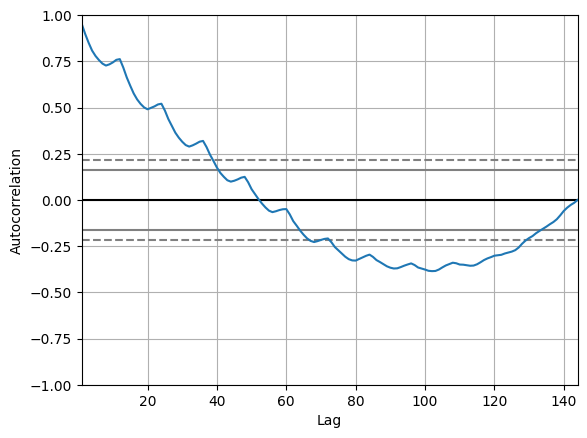

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_log)
plt.show()

In [43]:
q = 20

**Task:** Plot the predictions (not transformed to the original scale).

In [64]:
train['Passengers']

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1956-07-01    6.023448
1956-08-01    6.003887
1956-09-01    5.872118
1956-10-01    5.723585
1956-11-01    5.602119
Name: Passengers, Length: 95, dtype: float64

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                ARIMA(2, 2, 20)   Log Likelihood                 184.789
Date:                Mon, 14 Nov 2022   AIC                           -323.579
Time:                        22:54:53   BIC                           -255.594
Sample:                    01-01-1949   HQIC                          -295.953
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0245      0.183     -5.602      0.000      -1.383      -0.666
ar.L2         -0.6310      0.196     -3.220      0.001      -1.015      -0.247
ma.L1          0.2550      0.536      0.475      0.6

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


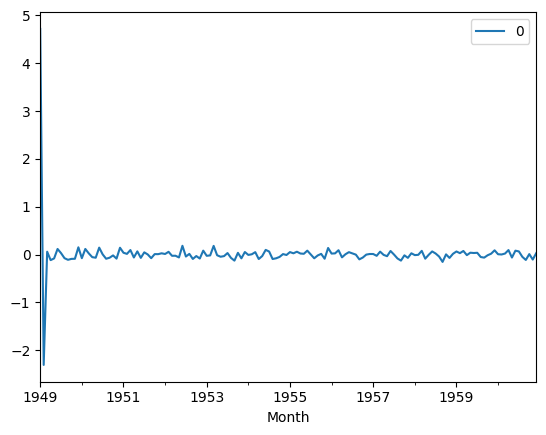

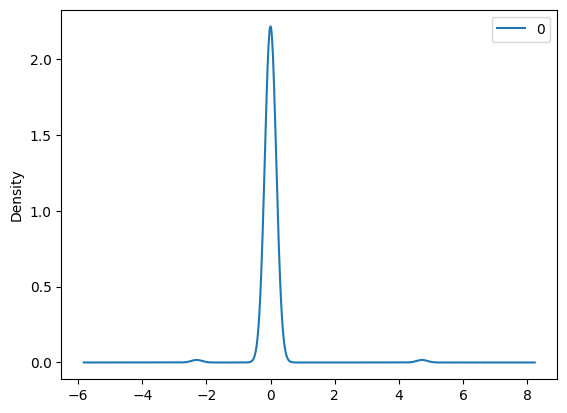

                0
count  144.000000
mean     0.015221
std      0.444036
min     -2.307064
25%     -0.060907
50%      0.002401
75%      0.037768
max      4.718499


In [65]:
X = df_log
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train['Passengers']]
predictions = list()

# fit model
model = ARIMA(df_log, order=(p,d,q))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [66]:
history

[4.718498871295094,
 4.770684624465665,
 4.882801922586371,
 4.859812404361672,
 4.795790545596741,
 4.90527477843843,
 4.997212273764115,
 4.997212273764115,
 4.912654885736052,
 4.77912349311153,
 4.6443908991413725,
 4.770684624465665,
 4.74493212836325,
 4.836281906951478,
 4.948759890378168,
 4.90527477843843,
 4.8283137373023015,
 5.003946305945459,
 5.135798437050262,
 5.135798437050262,
 5.062595033026967,
 4.890349128221754,
 4.736198448394496,
 4.941642422609304,
 4.976733742420574,
 5.0106352940962555,
 5.181783550292085,
 5.093750200806762,
 5.147494476813453,
 5.181783550292085,
 5.293304824724492,
 5.293304824724492,
 5.214935757608986,
 5.087596335232384,
 4.983606621708336,
 5.111987788356544,
 5.14166355650266,
 5.19295685089021,
 5.262690188904886,
 5.198497031265826,
 5.209486152841421,
 5.384495062789089,
 5.438079308923196,
 5.488937726156687,
 5.342334251964811,
 5.25227342804663,
 5.147494476813453,
 5.267858159063328,
 5.278114659230517,
 5.278114659230517,
 5.4

In [71]:
test['Passengers'][0]

5.723585101952381

In [72]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(p,d,q))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test['Passengers'][t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.692601, expected=5.723585


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.769722, expected=5.752573


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.659056, expected=5.707110


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.772794, expected=5.874931


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.889380, expected=5.852202


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.884893, expected=5.872118


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.918393, expected=6.045005


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.052606, expected=6.142037


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.175153, expected=6.146329


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.113235, expected=6.001415


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.871112, expected=5.849325


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.797319, expected=5.720312


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.771840, expected=5.817111


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.785704, expected=5.828946


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.762117, expected=5.762051


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.808658, expected=5.891644


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.947868, expected=5.852202


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.885431, expected=5.894403


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.993381, expected=6.075346


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.155784, expected=6.196444


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.240654, expected=6.224558


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.179609, expected=6.001415


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.848903, expected=5.883322


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.841762, expected=5.736572


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.779597, expected=5.820083


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.768443, expected=5.886104


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.766764, expected=5.834811


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.969959, expected=6.006353


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.974431, expected=5.981414


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.977556, expected=6.040255


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.131093, expected=6.156979


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.270129, expected=6.306275


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.328053, expected=6.326149


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.238889, expected=6.137727


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.063624, expected=6.008813


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.855382, expected=5.891644


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.905527, expected=6.003887


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.033407, expected=6.033086


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.982860, expected=5.968708


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.008494, expected=6.037871


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.046126, expected=6.133398


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.261036, expected=6.156979


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.196571, expected=6.282267


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.368489, expected=6.432940


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.452005, expected=6.406880


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.373755, expected=6.230481


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.139443, expected=6.133398


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.068399, expected=5.966147


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.046289, expected=6.068426


ValueError: Found input variables with inconsistent numbers of samples: [49, 50]

**Task:** Plot the predictions (transformed to the original scale).

**Task:** Plot the predictions for the next 10 years. How accurate do you think your model is predicting that far in the future? 